# Assignment _No_4_Que_1

# Q1) Delivery_time -> Predict delivery time using sorting time 
#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [6]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [7]:
# reading a csv file using pandas library
dataset=pd.read_csv("delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA And DATA Visualization ###

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [15]:
dataset=dataset.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })


Text(0, 0.5, 'Delivery time')

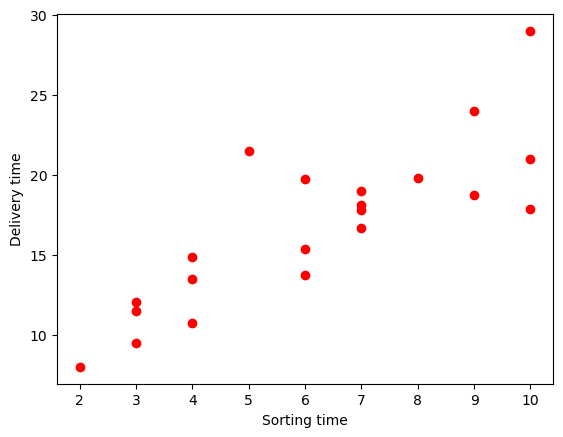

In [16]:
plt.scatter(x=dataset.st, y=dataset.dt, color='RED')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")


{'whiskers': [<matplotlib.lines.Line2D at 0x15f72756860>,
 'caps': [<matplotlib.lines.Line2D at 0x15f72756da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f727565c0>],
 'medians': [<matplotlib.lines.Line2D at 0x15f727572e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f72757580>],
 'means': []}

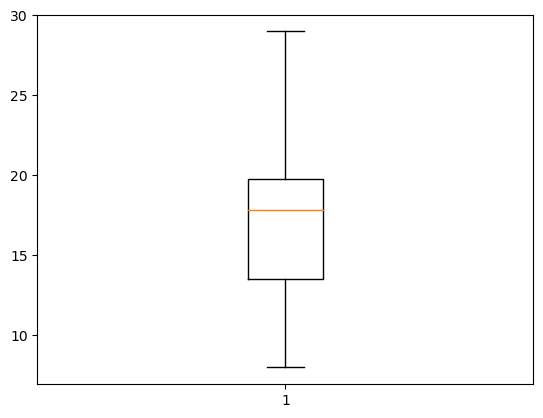

In [17]:
plt.boxplot(dataset.dt)

In [21]:
model2=smf.ols("dt~st",data=dataset).fit()

In [22]:
model2.params

Intercept    6.582734
st           1.649020
dtype: float64

In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        23:22:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model2.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [26]:
model3=smf.ols("dt~np.log(st)",data=dataset).fit()

In [27]:
model3.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [28]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           2.64e-06
Time:                        23:25:05   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [30]:
model3.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [31]:
pred2 = model2.predict(dataset) # Predicted values of dt using the model

In [32]:
pred3 = model3.predict(dataset) # Predicted values of dt using the model


Text(0, 0.5, 'Delivery time')

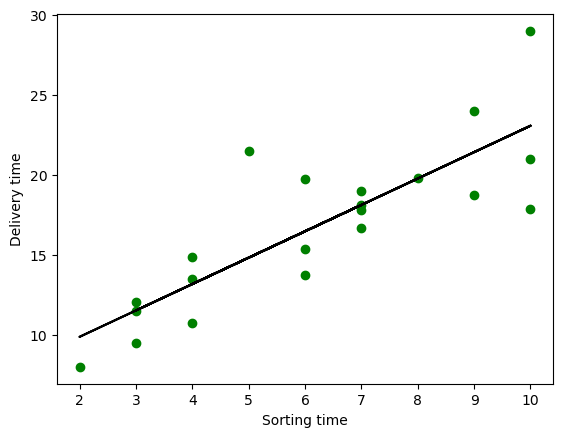

In [33]:

plt.scatter(x=dataset.st, y=dataset.dt, color='green')
plt.plot(dataset.st, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")


Text(0, 0.5, 'Delivery time')

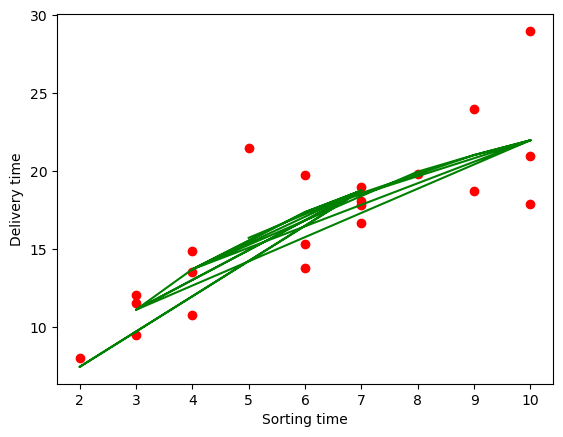

In [34]:
plt.scatter(x=dataset.st, y=dataset.dt, color='red')
plt.plot(dataset.st, pred3,color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")


C:\Users\Kajal\AppData\Local\Temp\ipykernel_8264\365015105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['dt'])


<Axes: xlabel='dt', ylabel='Density'>

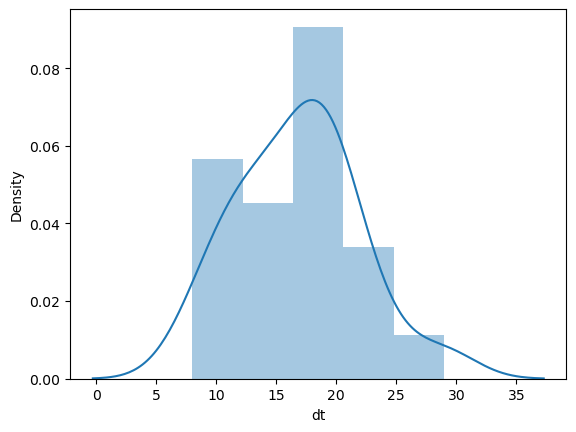

In [36]:
sns.distplot(dataset['dt'])

C:\Users\Kajal\AppData\Local\Temp\ipykernel_8264\811085162.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['st'])


<Axes: xlabel='st', ylabel='Density'>

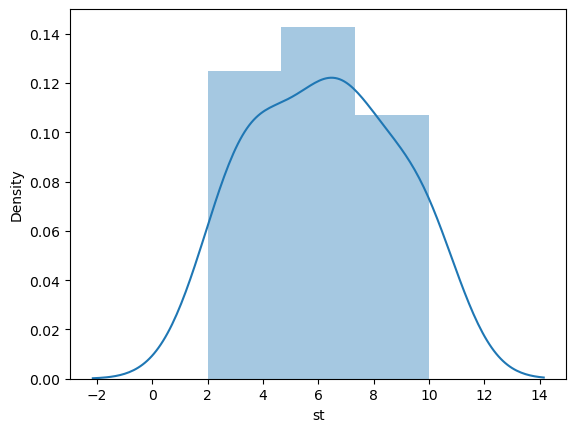

In [37]:
sns.distplot(dataset['st'])

# Feature Engineering #

In [38]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [39]:
#Correlation Analysis-
dataset.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


<Axes: xlabel='st', ylabel='dt'>

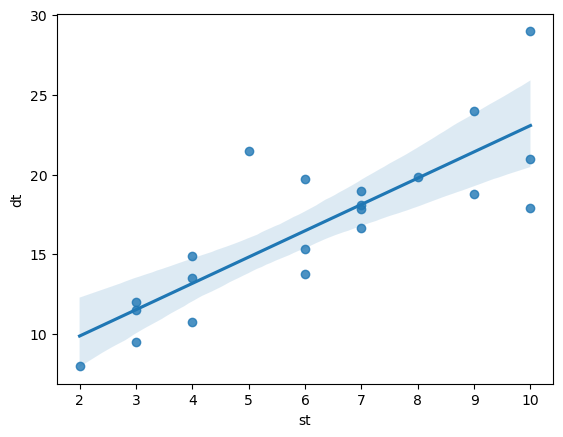

In [41]:
sns.regplot(x=dataset['st'],y=dataset['dt'])

# Model Building


In [43]:
model = smf.ols('dt~st',data=dataset).fit()

# Model Testing
# Finding Coefficient parameters
model.params


In [44]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [45]:
# Finding tvalues and pvalues
model.tvalues,model.pvalues

(Intercept    3.823349
 st           6.387447
 dtype: float64,
 Intercept    0.001147
 st           0.000004
 dtype: float64)

In [46]:
 ### Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [47]:
### Model Predictions

# Manual prediction for say sorting time 5

delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [48]:
# Automatic Prediction for say sorting time 5, 8

new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [49]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [52]:
model.predict(dataset)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# Assignment _No_4_Que_2 

# Q2) Salary_hike -> Build a prediction model for Salary_hike
#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [53]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [54]:
# import dataset
dataset=pd.read_csv("Salary_Data.csv")

# EDA And Data Visualization ###

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [56]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


C:\Users\Kajal\AppData\Local\Temp\ipykernel_8264\1750535190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

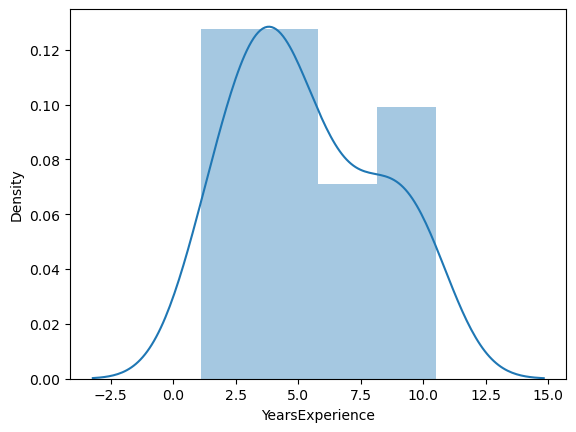

In [57]:
sns.distplot(dataset['YearsExperience'])

C:\Users\Kajal\AppData\Local\Temp\ipykernel_8264\3010132517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

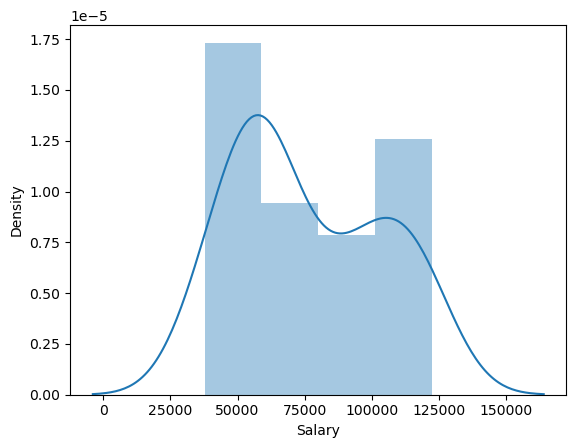

In [58]:
sns.distplot(dataset['Salary'])

In [59]:
#Correlation Analysis

dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

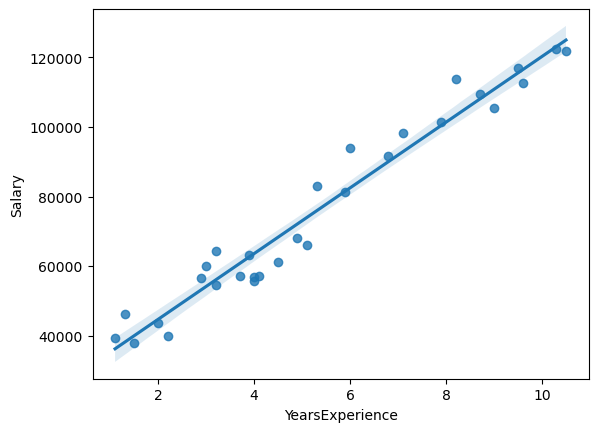

In [60]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [61]:
## Model Building

model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [62]:
# Model Testing

# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [63]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [64]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions ###

# Manual prediction for say 3 Years Experience


In [65]:
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

# Automatic Prediction for say 3 & 5 Years Experience 

In [66]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [67]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [68]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [69]:
pred_log = model.predict(pd.DataFrame(data_pred['YearsExperience']))

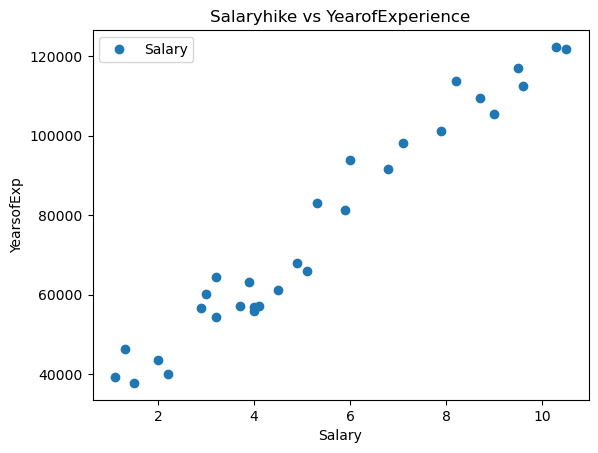

In [70]:
dataset.plot(x='YearsExperience', y='Salary', style='o') 
plt.title('Salaryhike vs YearofExperience')  
plt.xlabel('Salary') 
plt.ylabel('YearsofExp')
plt.show()

In [71]:
# calculate Pearson's correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(dataset['Salary'], dataset['YearsExperience'])
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.978


In [72]:
from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(dataset['Salary'], dataset['YearsExperience'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.957


C:\Users\Kajal\AppData\Local\Temp\ipykernel_8264\1758008229.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


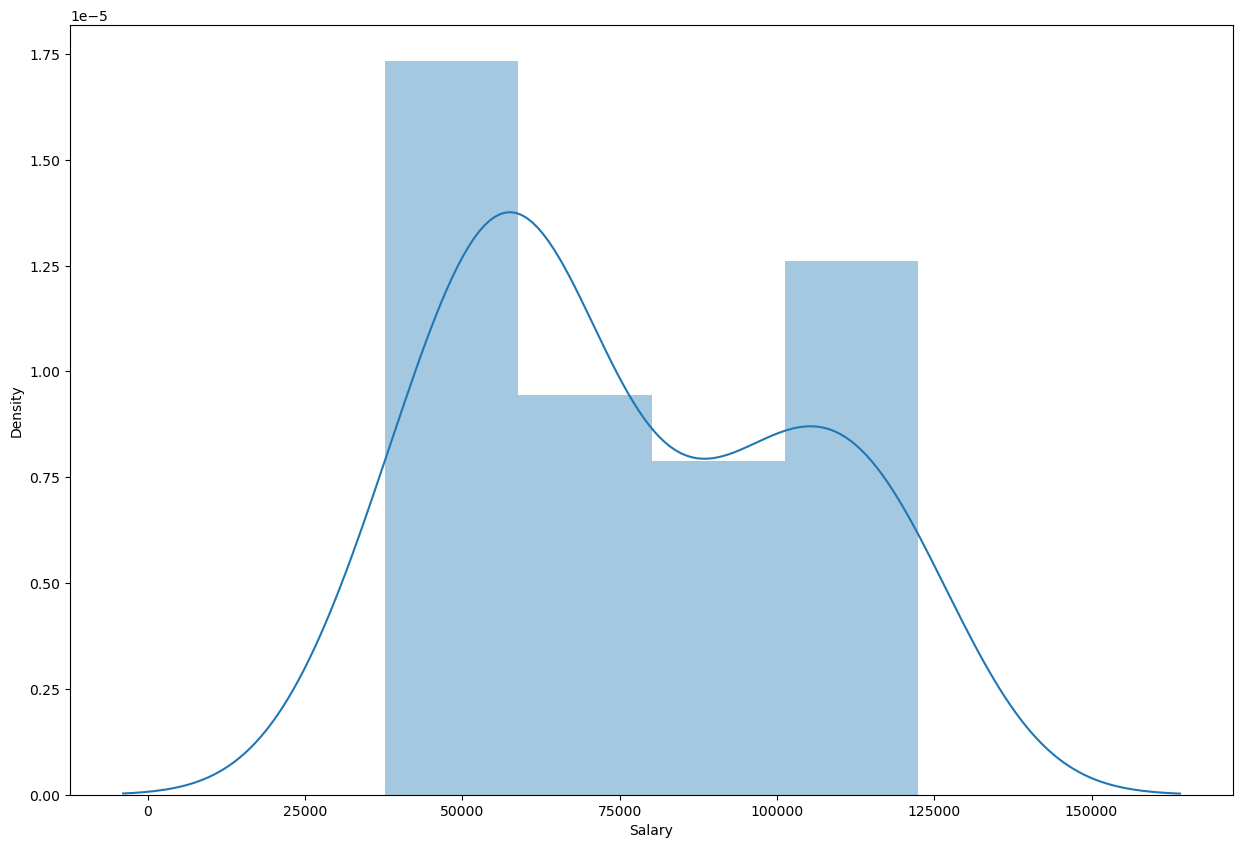

In [73]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['Salary'])
plt.show() 

C:\Users\Kajal\AppData\Local\Temp\ipykernel_8264\1083872079.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearsExperience'])


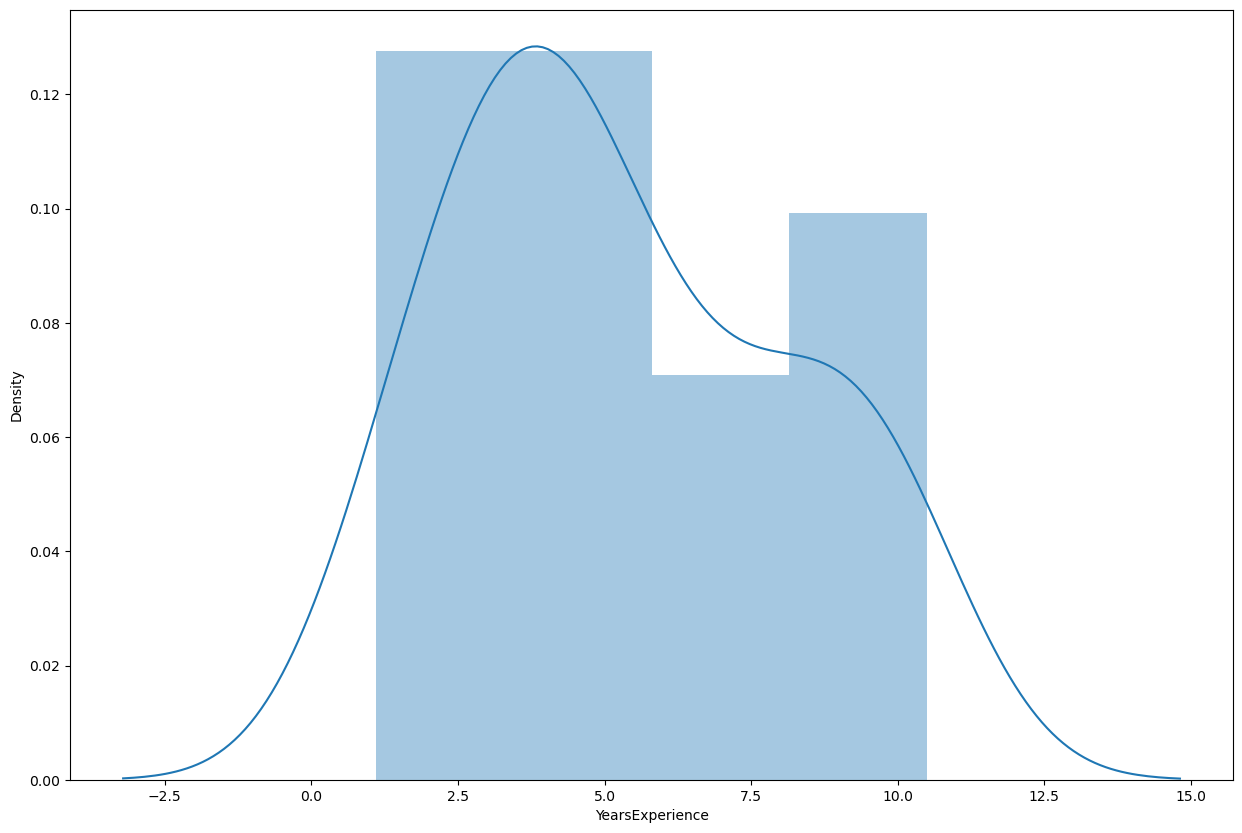

In [74]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['YearsExperience'])
plt.show()

In [75]:
# Input dataset
X = dataset['Salary'].values.reshape(-1,1)
print(X)
# Output or Predicted Value of data
y = dataset['YearsExperience'].values.reshape(-1,1)
#print(log(y))

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)


In [81]:
predict_reg = LinearRegression()

In [82]:
predict_reg.fit(X_train, y_train)


LinearRegression()

In [83]:
print(" Intercept value of Model is " ,predict_reg.intercept_)
print("Coefficient value of Model is ", predict_reg.coef_)



 Intercept value of Model is  [-2.4077501]
Coefficient value of Model is  [[0.00010235]]


In [84]:
y_pred = predict_reg.predict(X_test)


In [85]:
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
pmsh_pf


,Actual,Predict
0,9.6,9.120593
1,4.9,4.545795
2,8.2,9.241061
3,5.3,6.096418
4,3.2,4.188282
5,3.7,3.445621


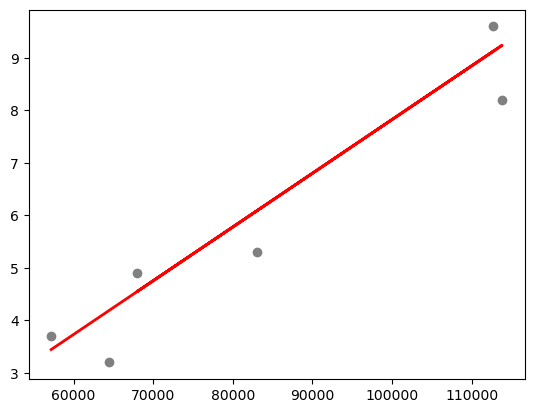

In [86]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 0.6522919548483546
Mean Squared Error: 0.5191320118982418
Root Mean Squared Error: 0.7205081622703811
R^2 Score :           0.9039484379486216
